In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as st

In [2]:
car=pd.read_csv("D:/Machine Learning Practical/Lab Exercises/Lab 2/Program 1/car.csv")
car

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
#Checking for null values
car.isnull().sum()

#No null values found so we can proceed with this dataset

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [4]:
#To know about the features
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [13]:
#Multiple linear Model for predicting Sales using Price, Urban, and US

#Getting the response and predictor variables
X=pd.DataFrame(car['Price'])
y=pd.DataFrame(car['Sales'])

#Since 2 features are categroical we create dummy variables
Urban_d = pd.get_dummies(car['Urban'], prefix='Urban', drop_first=True)
US_d = pd.get_dummies(car['US'], prefix='US', drop_first=True)

#Adding it to the 
X=pd.concat([X,Urban_d,US_d],axis=1)
X


,Price,Urban_Yes,US_Yes
0,120,1,1
1,83,1,1
2,80,1,1
3,97,1,1
4,128,1,0
...,...,...,...
395,128,1,1
396,120,0,1
397,159,1,1
398,95,1,1


In [42]:
#MULTIPLE lINEAR REGRESSION

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#parameters=pd.DataFrame()

B0=[]
B1=[]
B2=[]
B3=[]
#creating 10 samples
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=i)
    
    X_train=sm.add_constant(X_train)

    model_1 = sm.OLS(y_train,X_train)
    model_fit=model_1.fit()

    m=model_fit.params
    
    B0.append(m['const'])
    B1.append(m['Price'])
    B2.append(m['Urban_Yes'])
    B3.append(m['US_Yes'])
    
################################################
parameters = pd.DataFrame({"Constant[B0]":B0,
                           "Price[B1]":B1,
                            "Urban_Yes[B2]":B2,
                            "US_Yes[B3]":B3
                          })
parameters
#We obtained the coefficent terms for 10 different training and testing samples


,Constant[B0],Price[B1],Urban_Yes[B2],US_Yes[B3]
0,13.585683,-0.059189,-0.229004,1.223417
1,12.889222,-0.052584,-0.058058,1.116253
2,13.012563,-0.054205,-0.124658,1.340189
3,13.191427,-0.056958,-0.011104,1.300243
4,12.962806,-0.052535,-0.137091,0.948714
5,12.851674,-0.053897,-0.083767,1.314599
6,13.153857,-0.054990,-0.319972,1.412003
7,12.976151,-0.054603,-0.111192,1.564073
8,12.961148,-0.052917,-0.271831,1.128820
9,12.892510,-0.053229,0.046517,0.949652


In [43]:
#PREDICTION

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


name=["S1","S2","S3","S4","S5","S6","S7","S8","S9","S10"]
prediction_test=pd.DataFrame()
prediction_train=pd.DataFrame()
y_test_10=pd.DataFrame()

#creating 10 samples
for i in range(10):
    #splitiing the data
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=i)
    
    #creating a dataframe with only y_test values for 10 samples
    y_test_10.insert(i,name[i],list(y_test.iloc[:,0]),True)
    
    #MLR MODEL
    X_train=sm.add_constant(X_train)

    model_1 = sm.OLS(y_train,X_train)
    model_fit=model_1.fit()
    
    X_test=sm.add_constant(X_test)
    
    pred_test=model_fit.predict(X_test)
    pred_train=model_fit.predict(X_train)
    #df=pd.DataFrame(pred)
    #df
    prediction_test.insert(i,name[i],list(pred_test),True)
    prediction_train.insert(i,name[i],list(pred_train),True)

#We obtained the predicted value for 10 different samples

#y_test values for 10 samples
y_test_10

#prediction for tEST values
prediction_test

#prediction for train values
prediction_train



,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10
0,5.958085,5.632675,7.452479,8.329051,7.049918,3.820997,6.115190,8.861469,6.286342,8.580999
1,7.181502,7.940883,9.474309,5.900742,7.890482,7.105760,6.272398,10.497586,7.520996,6.915742
2,7.173752,9.255474,8.861807,8.055363,7.975038,6.081716,5.667513,5.329688,6.145150,6.658060
3,8.365277,7.204711,6.383314,5.993753,7.204445,7.485996,4.915385,8.914087,5.563062,6.232232
4,6.187090,8.484189,4.811372,8.613843,7.575271,7.291478,5.630249,7.712812,8.586584,6.815997
...,...,...,...,...,...,...,...,...,...,...
275,8.483655,9.688139,9.149080,4.978302,7.922503,8.560980,4.245544,7.876623,7.150576,6.862513
276,8.081129,6.731458,5.407626,7.826226,6.839777,8.746698,5.510304,8.149640,6.611089,8.467830
277,6.313218,7.695434,6.600134,6.516181,5.575852,8.560980,8.691940,8.498671,8.685174,6.809285
278,6.964294,7.006372,5.207055,5.900742,3.243787,5.458978,5.465281,7.166778,8.586584,8.193227


In [10]:
#ERRORS

#Testing Error of the first sample

l1=list(prediction_test.iloc[:,0])
l2=list(y_test.iloc[:,0])
array1 = np.array(l1)
array2 = np.array(l2)

subtracted_array = np.subtract(array1, array2)
subtracted = list(subtracted_array)
error_test= pd.DataFrame(subtracted)
error_test

#renaming column
error_test.rename(columns = {0:'Error'}, inplace = True)
error_test


,Error
0,5.620426
1,3.644996
2,-4.208871
3,-0.002008
4,-0.806892
...,...
115,-1.686501
116,-1.369775
117,-2.022444
118,0.934575


In [13]:
#ALL TESTING ERRORS

#Testing Error

name_1=["E1","E2","E3","E4","E5","E6","E7","E8","E9","E10"]
#name=["S1","S2","S3","S4","S5","S6","S7","S8","S9","S10"]
error_test=pd.DataFrame()

for i in range(0,10):
    
    l1=list(prediction_test.iloc[:,i])
    l2=list(y_test_10.iloc[:,i])
    array1 = np.array(l1)
    array2 = np.array(l2)

    subtracted_array = np.subtract(array1, array2)
    subtracted = list(subtracted_array)
    
    error_test.insert(i,name_1[i],subtracted,True)

#output
error_test

,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10
0,-3.009574,3.011968,1.284880,-7.029614,-1.134398,-2.085140,-0.174886,2.075192,-6.662761,5.801289
1,-1.335004,0.972622,0.726678,-0.665109,0.521909,-1.911683,-2.017977,1.086915,-1.344850,0.349854
2,0.701129,4.960629,1.763101,-2.565846,0.021536,-2.445842,-1.443216,0.405985,0.600996,-5.374258
3,2.607992,-4.218126,-0.735691,-5.056662,-0.117828,6.841625,0.527429,-2.537032,-1.196927,1.278774
4,2.353108,-0.866787,0.418298,-1.521193,4.232784,-4.254478,-1.414844,1.821226,-2.031921,-0.429603
...,...,...,...,...,...,...,...,...,...,...
115,-0.896501,3.510964,-1.265095,-6.379168,1.784004,-0.894461,-4.412383,0.764224,1.544673,1.194170
116,3.770225,-2.521714,3.672826,-3.172285,0.027544,-3.222787,4.861877,-0.584083,1.579270,-2.865201
117,-6.072444,3.276466,1.109293,-1.079658,-0.711581,1.152190,4.626964,2.386778,2.717251,1.420313
118,-1.875425,-0.312974,3.015553,-2.099583,1.793863,-4.063636,-0.600084,1.059795,0.869247,2.533889


# Let us consider the coefficients of the 1st Sample. We observe that

#### The intercept term in a regression table tells us the average expected value for the response variable when all of the predictor variables are equal to zero.
#### 1 UNIT INCREASE in the independent variable "PRICE" amounts to 0.059189 DECREASE in the dependent variable "SALES" 
#### For a categorical predictor variable, the regression coefficient represents the difference in the predicted value of the response variable between the category for which the predictor variable = 0 and the category for which the predictor variable = 1.
#### We interpret it as on average there is a 0.229004 DECREASE in SALES when it is URBAN compared to SALES when it is NOT URBAN
#### We interpret it as on average there is a 1.223417 INCREASE in SALES when it is US compared to SALES when it is NOT US

In [78]:
#4.For which of the predictors can you reject the null hypothesis H0 : βj = 0?

#Splitting the DATASET
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)
    
#MLR MODEL
X_train=sm.add_constant(X_train)

model_2 = sm.OLS(y_train,X_train)
model_fit2=model_2.fit()

#Summary
model_fit2.summary()

#ANSWER: We see that the p-values for "Price" and "US" are less than 0.05 and hence we can reject the null hypothesis
# for them.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     25.84
Date:                Sun, 19 Mar 2023   Prob (F-statistic):           9.25e-15
Time:                        07:26:26   Log-Likelihood:                -653.76
No. Observations:                 280   AIC:                             1316.
Df Residuals:                     276   BIC:                             1330.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8892      0.847     15.210      0.000      11.221      14.557
Price         -0.0526      0.007     -7.996      0.000      -0.066      -0.040
Urban_Yes     -0.0581      0.333     -0.174      0.862      -0.714       0.598
US_Yes         1.1163      0.320      3.483      0.001       0.485       1.747
==============================================================================
Omnibus:                        0.470   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.791   Jarque-Bera (JB):                0.514
Skew:                           0.097   Prob(JB):                        0.773
Kurtosis:                       2.922   Cond. No.                         673.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
#5.On the basis of your response to the previous question, fit a
#smaller model that only uses the predictors for which there is
#evidence of association with the outcome.

#Fitting the Original Model
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=1)
    
X_train=sm.add_constant(X_train)

model_2 = sm.OLS(y_train,X_train)
model_fit2=model_2.fit()

model_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     25.84
Date:                Sun, 19 Mar 2023   Prob (F-statistic):           9.25e-15
Time:                        07:26:27   Log-Likelihood:                -653.76
No. Observations:                 280   AIC:                             1316.
Df Residuals:                     276   BIC:                             1330.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.8892      0.847     15.210      0.000      11.221      14.557
Price         -0.0526      0.007     -7.996      0.000      -0.066      -0.040
Urban_Yes     -0.0581      0.333     -0.174      0.862      -0.714       0.598
US_Yes         1.1163      0.320      3.483      0.001       0.485       1.747
==============================================================================
Omnibus:                        0.470   Durbin-Watson:                   2.108
Prob(Omnibus):                  0.791   Jarque-Bera (JB):                0.514
Skew:                           0.097   Prob(JB):                        0.773
Kurtosis:                       2.922   Cond. No.                         673.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
#From the summary we see that the feature URBAN is non-significant hence does not contribute to the response variable much.
#We create a model with the other 2 regressors

X_train_1=X_train[["const","Price","US_Yes"]]
X_train_1

#Creating the new model
model_3 = sm.OLS(y_train,X_train_1)
model_fit3=model_3.fit()

model_fit3.summary()

#6. Answer: We observe that the Adjusted R2 value increases a little from 0.211 to 0.214. 
        #The residual standard error of the model is small which means that the regression model is fitting the data well.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     41.11
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           2.33e-16
Time:                        17:46:45   Log-Likelihood:                -642.84
No. Observations:                 280   AIC:                             1292.
Df Residuals:                     277   BIC:                             1303.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.9220      0.781     16.544      0.000      11.384      14.460
Price         -0.0532      0.006     -8.379      0.000      -0.066      -0.041
US_Yes         0.9508      0.305      3.115      0.002       0.350       1.552
==============================================================================
Omnibus:                        1.119   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.571   Jarque-Bera (JB):                1.097
Skew:                           0.012   Prob(JB):                        0.578
Kurtosis:                       2.694   Cond. No.                         641.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
#7. Using the model from (v), obtain 95% confidence intervals for the coefficient(s).

#MULTIPLE lINEAR REGRESSION

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

parameters=pd.DataFrame()

B0=[]
B1=[]
B2=[]

#creating 10 samples
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=i)
    
    
    
    X_train=sm.add_constant(X_train)

    X_train_2=X_train[["const","Price","US_Yes"]]
    X_train_2
    
    model_1 = sm.OLS(y_train,X_train_2)
    model_fit=model_1.fit()

    m=model_fit.params
    
    B0.append(m['const'])
    B1.append(m['Price'])
    B2.append(m['US_Yes'])
    
parameters = pd.DataFrame({"Constant[B0]":B0,
                           "Price[B1]":B1,
                            "US_Yes[B2]":B2
                          })
parameters

#We obtained the coefficent terms for 10 different training and testing samples


print(st.t.interval(alpha=0.95, df=len(a)-1, loc=np.mean(a), scale=st.sem(a)))


(12.82715868726001, 13.119576276762029)


C:\Users\jesto\AppData\Local\Temp\ipykernel_6236\4213919497.py:43: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  print(st.t.interval(alpha=0.95, df=len(a)-1, loc=np.mean(a), scale=st.sem(a)))


In [60]:
#CONFIDENCE INTERVALS
print(st.t.interval(alpha=0.95, df=len(parameters["Constant[B0]"])-1, loc=np.mean(parameters["Constant[B0]"]), scale=st.sem(parameters["Constant[B0]"])))
print(st.t.interval(alpha=0.95, df=len(parameters["Price[B1]"])-1, loc=np.mean(parameters["Price[B1]"]), scale=st.sem(parameters["Price[B1]"])))
print(st.t.interval(alpha=0.95, df=len(parameters["US_Yes[B2]"])-1, loc=np.mean(parameters["US_Yes[B2]"]), scale=st.sem(parameters["US_Yes[B2]"])))

(12.82715868726001, 13.119576276762029)
(-0.05616769633057697, -0.05305241328059335)
(1.0828348707306814, 1.362912405107469)


C:\Users\jesto\AppData\Local\Temp\ipykernel_6236\94744973.py:2: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  print(st.t.interval(alpha=0.95, df=len(parameters["Constant[B0]"])-1, loc=np.mean(parameters["Constant[B0]"]), scale=st.sem(parameters["Constant[B0]"])))
C:\Users\jesto\AppData\Local\Temp\ipykernel_6236\94744973.py:3: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  print(st.t.interval(alpha=0.95, df=len(parameters["Price[B1]"])-1, loc=np.mean(parameters["Price[B1]"]), scale=st.sem(parameters["Price[B1]"])))
C:\Users\jesto\AppData\Local\Temp\ipykernel_6236\94744973.py:4: DeprecationWarning: Use of keyword argument `alpha` for method `interval` is deprecated. Use first positional argument or keyword argument `confidence` instead.
  print(st.t.interval(

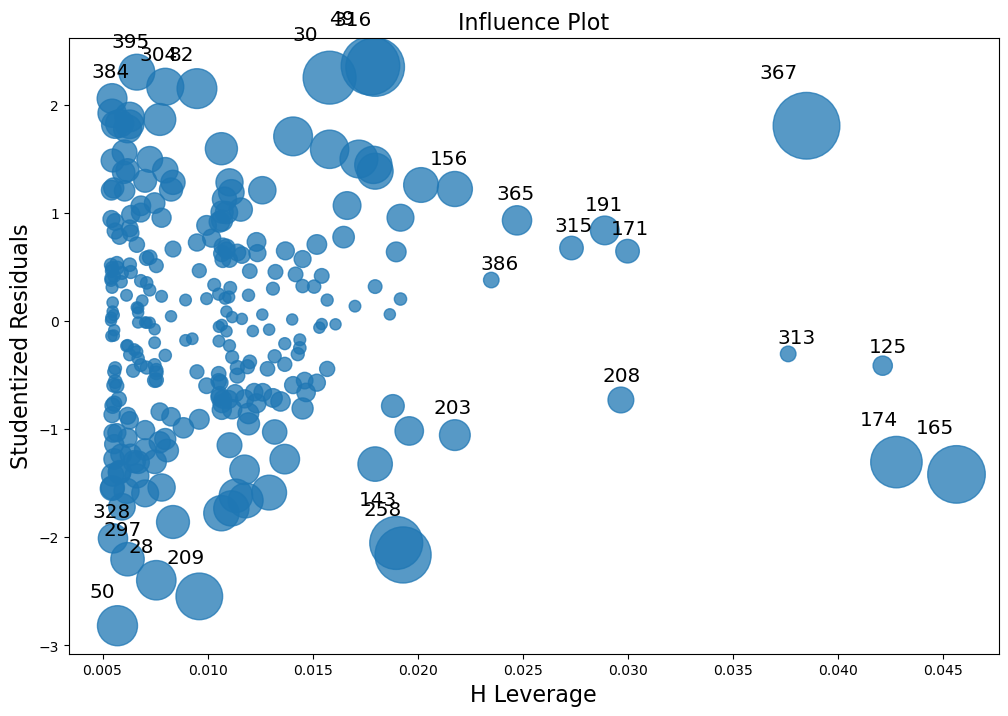

In [63]:
#8. Is there evidence of outliers or high leverage observations in the model from (v)?

fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(model_fit3, alpha  = 0.05, ax = ax, criterion="cooks")

#From the graph we see that there are many influential and outliers.